### EJ 1 - DATASET CREDITCARD.CSV

In [3]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.duplicated().sum()

duplicated_rows = df.duplicated()
if duplicated_rows.any():
    print("Existen filas duplicadas")
else:
    print("No existen filas duplicadas")
    
duplicated_cols = df.columns[df.columns.duplicated(keep=False)]
if len(duplicated_cols) > 0:
    print('Existen columnas duplicadas:', list(duplicated_cols))
else:
    print('No hay columnas duplicadas')

print(df.isnull().sum(),'\n')

Existen filas duplicadas
No hay columnas duplicadas
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64 



In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
for i in df.columns:
    if df[i].isnull().sum() == 0:
        print("No hay valores nulos en:", i)
    else:
        print(i,'{:.2f}%'.format(df[i].isnull().sum()/len(df[i])*100),df[i].dtype)

No hay valores nulos en: Time
No hay valores nulos en: V1
No hay valores nulos en: V2
No hay valores nulos en: V3
No hay valores nulos en: V4
No hay valores nulos en: V5
No hay valores nulos en: V6
No hay valores nulos en: V7
No hay valores nulos en: V8
No hay valores nulos en: V9
No hay valores nulos en: V10
No hay valores nulos en: V11
No hay valores nulos en: V12
No hay valores nulos en: V13
No hay valores nulos en: V14
No hay valores nulos en: V15
No hay valores nulos en: V16
No hay valores nulos en: V17
No hay valores nulos en: V18
No hay valores nulos en: V19
No hay valores nulos en: V20
No hay valores nulos en: V21
No hay valores nulos en: V22
No hay valores nulos en: V23
No hay valores nulos en: V24
No hay valores nulos en: V25
No hay valores nulos en: V26
No hay valores nulos en: V27
No hay valores nulos en: V28
No hay valores nulos en: Amount
No hay valores nulos en: Class


In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

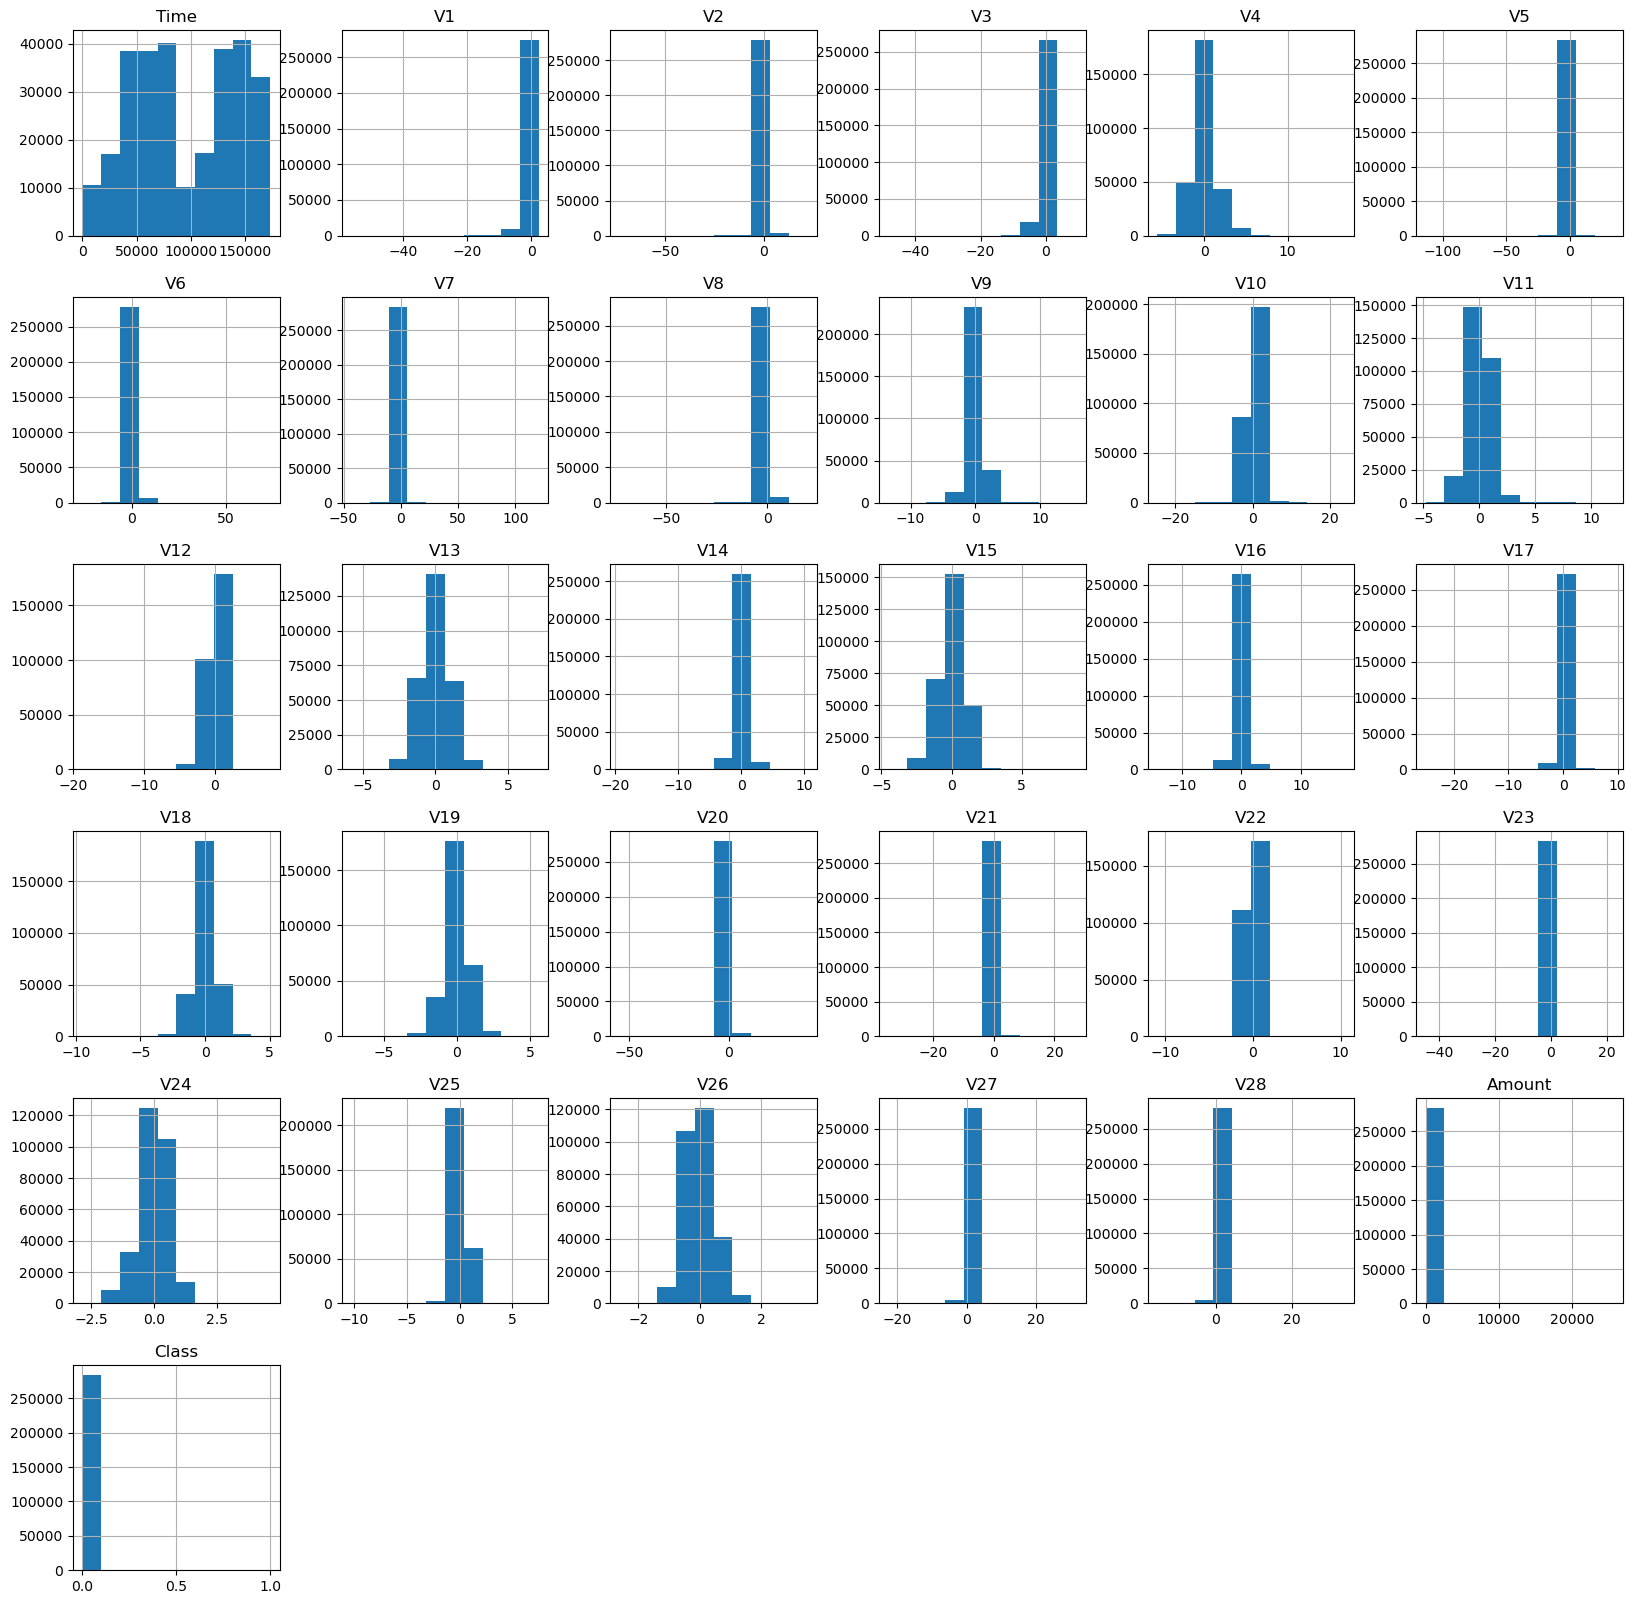

In [9]:
hist = df.hist(figsize=(20,20))

In [10]:
#normalizar los datos
df = df.drop(['Time'], axis=1)
col_class = df.pop('Class')
df.head(5)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df = pd.concat([scaled_df, col_class], axis=1)
scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [12]:
X = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
y.value_counts()

Shape of X: (284807, 29)
Shape of y: (284807,)


0    284315
1       492
Name: Class, dtype: int64

### SMOTE (Synthetic Minority Over-sampling Technique)

Debido a que la columna 'Class' ("0 : 284315 instancias, 1 : 492 instancias") es muy desigual usaremos SMOTE para equilibrar la columna

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010)

print("Instancias X_train dataset: ", X_train.shape)
print("Instancias y_train dataset: ", y_train.shape)
print("Instancias X_test dataset: ", X_test.shape)
print("Instancias y_test dataset: ", y_test.shape,'\n')
print("Class y antes del sobre muestreo: '1': {}".format(sum(y_train==1)))
print("Class y antes del sobre muestreo: '0': {} \n".format(sum(y_train==0)))

Instancias X_train dataset:  (227845, 29)
Instancias y_train dataset:  (227845,)
Instancias X_test dataset:  (56962, 29)
Instancias y_test dataset:  (56962,) 

Class y antes del sobre muestreo: '1': 403
Class y antes del sobre muestreo: '0': 227442 



In [14]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('Despues del sobre muestreo, shape of train_X:',X_train_res.shape)
print('Despues del sobre muestreo, shape of train_y:',y_train_res.shape)
print("Despues del sobre muestreo, 'Class' counts label '1'",sum(y_train_res==1))
print("Despues del sobre muestreo, 'Class' counts label '0'",sum(y_train_res==0))

Despues del sobre muestreo, shape of train_X: (454884, 29)
Despues del sobre muestreo, shape of train_y: (454884,)
Despues del sobre muestreo, 'Class' counts label '1' 227442
Despues del sobre muestreo, 'Class' counts label '0' 227442


In [15]:
logreg = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=400)
logreg.fit(X_train, y_train)
print(logreg)
y_expect = y_test
y_pred_logreg= logreg.predict(X_test)
print(accuracy_score(y_expect, y_pred_logreg))

LogisticRegression(max_iter=400, random_state=0)
0.9992977774656788


In [16]:
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Precision:",accuracy_score(y_test, y_pred_logreg)*100,"%")

[[56861    12]
 [   28    61]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.84      0.69      0.75        89

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Precision: 99.92977774656788 %


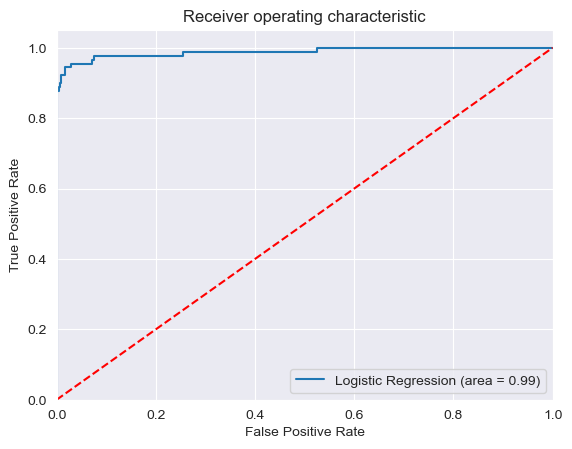

In [17]:
sns.set_style("darkgrid")
tmp = logreg.fit(X_train_res, y_train_res.ravel())
y_pred_sample_score = tmp.decision_function(X_test)
logit_roc_auc = roc_auc_score(y_test,y_pred_sample_score)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_sample_score)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [18]:
#Validacion cruzada
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import KFold
scores = cross_val_score(logreg, X_train_res, y_train_res.ravel(), cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.945118   0.9448432  0.9425679  0.94487618 0.94460077]
Accuracy: 0.94 (+/- 0.00)


### RIDGE (L2) & LASSO (L1)

L1 se refiere a la regularización Lasso, que agrega una penalización proporcional al valor absoluto de los coeficientes de las variables. Esto tiene el efecto de "encoger" los coeficientes de algunas variables a cero, lo que significa que se eliminan del modelo. L1 es útil para la selección de características, ya que puede ayudar a identificar las variables más importantes.

L2 se refiere a la regularización Ridge, que agrega una penalización proporcional al cuadrado de los coeficientes de las variables. Esto tiene el efecto de reducir los coeficientes de todas las variables, pero no necesariamente a cero. L2 es útil para reducir la variabilidad en los coeficientes y mejorar la estabilidad del modelo.

In [19]:
ridge = Ridge(alpha=0.94).fit(X_train_res, y_train_res)
print("Training set score:", ridge.score(X_train_res, y_train_res))
print("Test set score:", ridge.score(X_train_res, y_train_res))

lasso = Lasso(alpha=0.036, max_iter=200).fit(X_train_res, y_train_res)
print("Training set score: {:.2f}".format(lasso.score(X_train_res, y_train_res)))
print("Test set score: {:.2f}".format(lasso.score(X_train_res, y_train_res)))


Training set score: 0.6415575502650399
Test set score: 0.6415575502650399
Training set score: 0.60
Test set score: 0.60


### EJ2 - DATASET 

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

El objetivo de BostonHousing es predecir el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares. Es uno de los datasets más utilizados en el aprendizaje automático y la estadística para experimentar con algoritmos de regresión.

In [20]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [21]:
df_Boston = pd.read_csv('3_BostonHousing.csv')
df_Boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
df_Boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [23]:
df_Boston.replace('nan', np.nan, inplace=True)
for i in df_Boston.columns:
    if df_Boston[i].isnull().sum() == 0 or df_Boston[i].isna().sum() == 0 or df_Boston[i].isnull().sum() == 0 and df_Boston[i].isna().sum() == 0:
        print('No hay valores nulos en',i)
    else:
        print('Si hay valores nulos en',i,'{:.2f}%'.format(df_Boston[i].isnull().sum()/len(df_Boston[i])*100),df_Boston[i].dtype)

No hay valores nulos en crim
No hay valores nulos en zn
No hay valores nulos en indus
No hay valores nulos en chas
No hay valores nulos en nox
No hay valores nulos en rm
No hay valores nulos en age
No hay valores nulos en dis
No hay valores nulos en rad
No hay valores nulos en tax
No hay valores nulos en ptratio
No hay valores nulos en b
No hay valores nulos en lstat
No hay valores nulos en medv


In [24]:
df_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [29]:
print("valores min y max:",df_Boston['medv'].describe().loc[['min','max']],sep='\n')

valores min y max:
min     5.0
max    50.0
Name: medv, dtype: float64


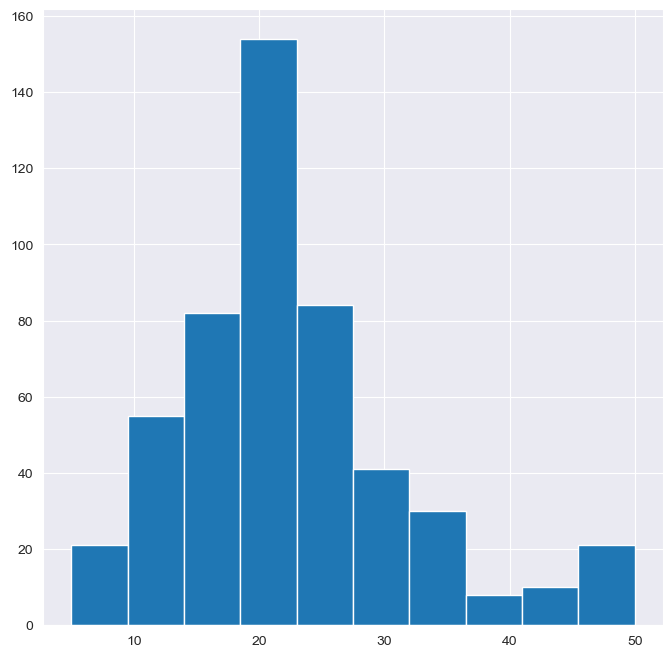

In [34]:
df_Boston['medv'].hist(figsize=(8,8))
plt.show()

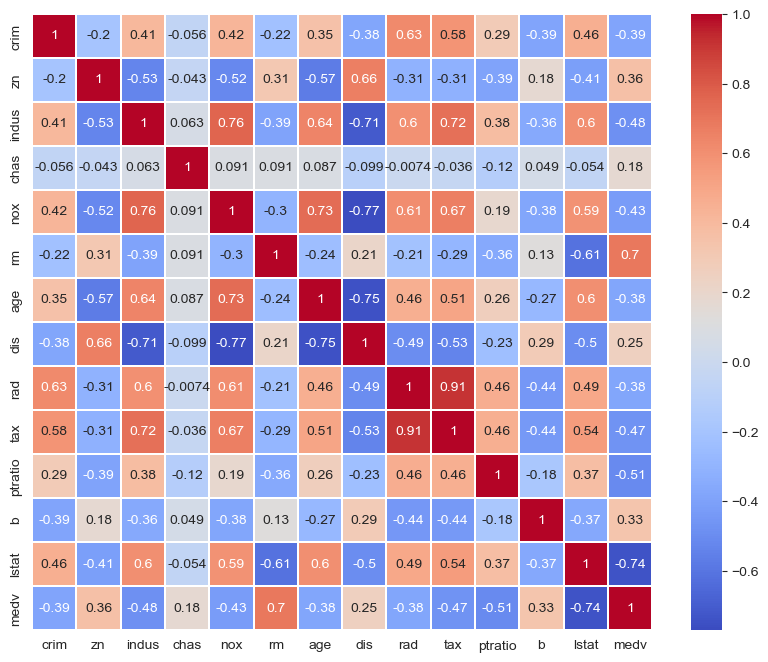

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
corr_Boston = df_Boston.corr()
sns.heatmap(corr_Boston, annot=True, cmap='coolwarm',linewidths=0.2)
plt.show()